In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
from faker import Faker
import pandas as pd
import random
import seaborn as sns
from matplotlib import pyplot as plt
fake = Faker()

In [3]:
#Create the dataframes
states = ['Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire','New Jersey','New York','North Carolina','Rhode Island','South Carolina','Virginia']

employees = pd.DataFrame([{'id': i+1,
                'name': fake.first_name(),
                'lastname' : fake.last_name(),
                'phone': fake.phone_number(),
                'state': random.choice(states)} for i in range (10000)])

salary = pd.DataFrame([{'id': i+1,
             'departmentid': random.randint(1,7),
             'annualsalary': random.randint(50000,200000)} for i in range (10000)])

department = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6, 7],
                 'name': [ 'Marketing', 'Finance', 'Operations management', 'Human Resource', 'IT', 'Sales', 'Production']})

In [4]:
employees

,id,name,lastname,phone,state
0,1,Chad,Johnson,093-361-0190x67001,Georgia
1,2,Jason,Phillips,156-596-6260,Connecticut
2,3,Glen,Moon,997-308-8812,North Carolina
3,4,Jennifer,Carter,486-166-4765,New Jersey
4,5,Jack,Garcia,(435)400-0317x150,Georgia
...,...,...,...,...,...
9995,9996,Donald,Keller,065.113.1982x707,Maryland
9996,9997,Rebecca,Ford,+1-166-448-6872x55885,Rhode Island
9997,9998,Kelly,Swanson,001-967-774-5364,Virginia
9998,9999,Michael,Adams,001-011-821-2447x188,Maine


In [5]:
salary

,id,departmentid,annualsalary
0,1,6,109353
1,2,1,167272
2,3,4,153364
3,4,2,148177
4,5,6,108975
...,...,...,...
9995,9996,2,104251
9996,9997,2,109764
9997,9998,2,170150
9998,9999,4,134266


In [6]:
department

,id,name
0,1,Marketing
1,2,Finance
2,3,Operations management
3,4,Human Resource
4,5,IT
5,6,Sales
6,7,Production


<AxesSubplot:title={'center':'Average Salary for each Department'}, xlabel='Departments', ylabel='Salary'>

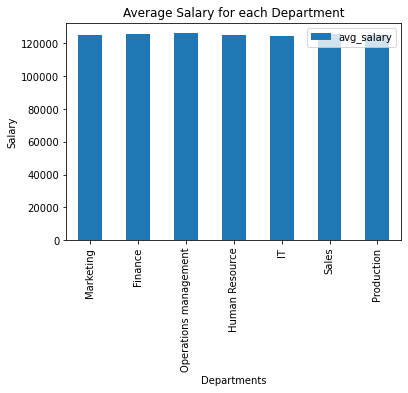

In [7]:
#Visualize the average salary of each department
avg_salary_depid = salary \
                .groupby('departmentid') \
                .agg(avg_salary = ('annualsalary', 'mean'))
avg_salary_dep = avg_salary_depid.merge(department, left_on='departmentid', right_on='id')
avg_salary_dep.plot.bar(x='name', y='avg_salary', title = 'Average Salary for each Department', xlabel = 'Departments', ylabel = 'Salary')

In [8]:
#the below dataframe is just to display the average.
avg_salary_dep

,avg_salary,id,name
0,125209.528886,1,Marketing
1,125713.376344,2,Finance
2,126343.469602,3,Operations management
3,125213.353069,4,Human Resource
4,124812.296395,5,IT
5,125519.380042,6,Sales
6,125142.715590,7,Production


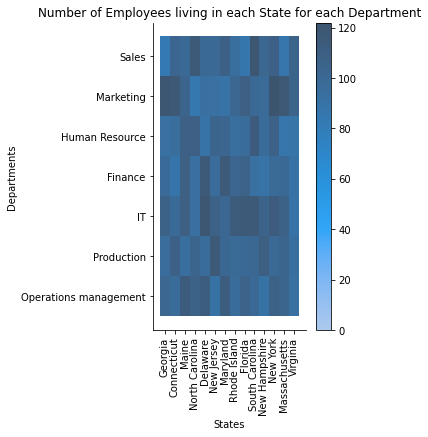

In [9]:
#Visualize the total number of employees living in each state for each department
agg_1 = employees.merge(salary, on= 'id')
agg_2 = agg_1.merge(department, left_on='departmentid', right_on='id', suffixes=['_emp','_dep'])

plot = sns.displot(agg_2, x="state", y="name_dep", cbar = True)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Employees living in each State for each Department")
plot.set_xlabels('States')
plot.set_ylabels('Departments')

In [10]:
#the below dataframe is just to check the count.
no_of_employees = agg_2 \
                  .groupby(['state','name_dep']) \
                  .agg(no_of_employees = ('id_emp', 'count'))
no_of_employees

no_of_employees
state       name_dep                              
Connecticut Finance                             88
            Human Resource                      95
            IT                                  99
            Marketing                          117
            Operations management               97
...                                            ...
Virginia    IT                                  90
            Marketing                          106
            Operations management               93
            Production                          94
            Sales                              106

[98 rows x 1 columns]

Text(0, 0.5, 'Salaries')

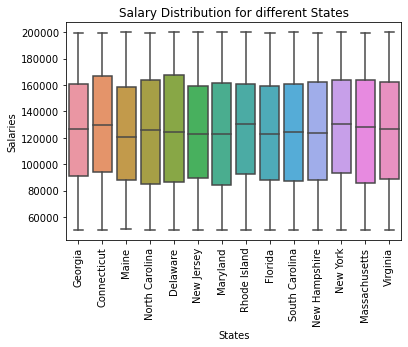

In [11]:
#Visualize salary distribution of different states
plot = sns.boxplot(data = agg_2, x = 'state', y = 'annualsalary')
plot.axes.tick_params(axis = 'x', labelrotation = 90)
plot.axes.set_title("Salary Distribution for different States")
plot.set_xlabel("States")
plot.set_ylabel("Salaries")

Text(0, 0.5, 'Salaries')

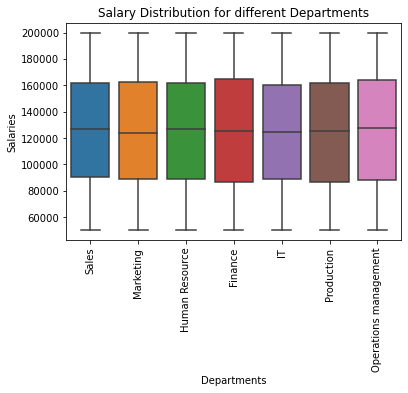

In [12]:
#Visualize salary distribution of different departments
plot = sns.boxplot(data = agg_2, x = 'name_dep', y = 'annualsalary')
plot.axes.tick_params(axis = 'x', labelrotation = 90)
plot.axes.set_title("Salary Distribution for different Departments")
plot.set_xlabel("Departments")
plot.set_ylabel("Salaries")